## 6.5 Machine Learning Part 2 -Superstore data

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'/Users/margoshogren/Desktop/1 Margo-CF Folder -desktop/4 Python/4-2023 Instacart Basket Analysis'

In [6]:
SS = pd.read_csv(os.path.join(path,'Superstore','Superstore.csv'), encoding = 'Latin-1')

In [7]:
SS.shape

(9994, 21)

In [8]:
SS.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
SS.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
SS2 = SS[['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']]

### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(SS2).score(SS2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/margoshogren/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/margoshogren/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/margoshogren/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/margoshogren/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-10361221241375.98,
 -1889171320667.523,
 -833254451549.1827,
 -496196775977.6455,
 -345179285720.6598,
 -246149411405.36234,
 -187925025306.59192,
 -160516528888.09015,
 -148529738887.80493]

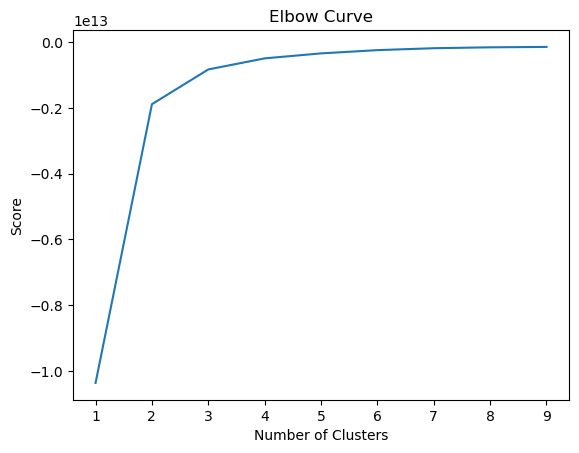

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [20]:
# Fit the k-means object to the data.

kmeans.fit(SS2)

/Users/margoshogren/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
SS2['clusters'] = kmeans.fit_predict(SS2)

/Users/margoshogren/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/dj/4qjrg2bn07928wblcylhwx240000gn/T/ipykernel_85468/1730925686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SS2['clusters'] = kmeans.fit_predict(SS2)


In [22]:
SS2.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,clusters
0,1,42420,261.9600,2,0.00,41.9136,2
1,2,42420,731.9400,3,0.00,219.5820,2
2,3,90036,14.6200,2,0.00,6.8714,1
3,4,33311,957.5775,5,0.45,-383.0310,2
4,5,33311,22.3680,2,0.20,2.5164,2


In [23]:
SS2['clusters'].value_counts()

1    4391
0    3002
2    2601
Name: clusters, dtype: int64

#### Cluster 1 has the most data points

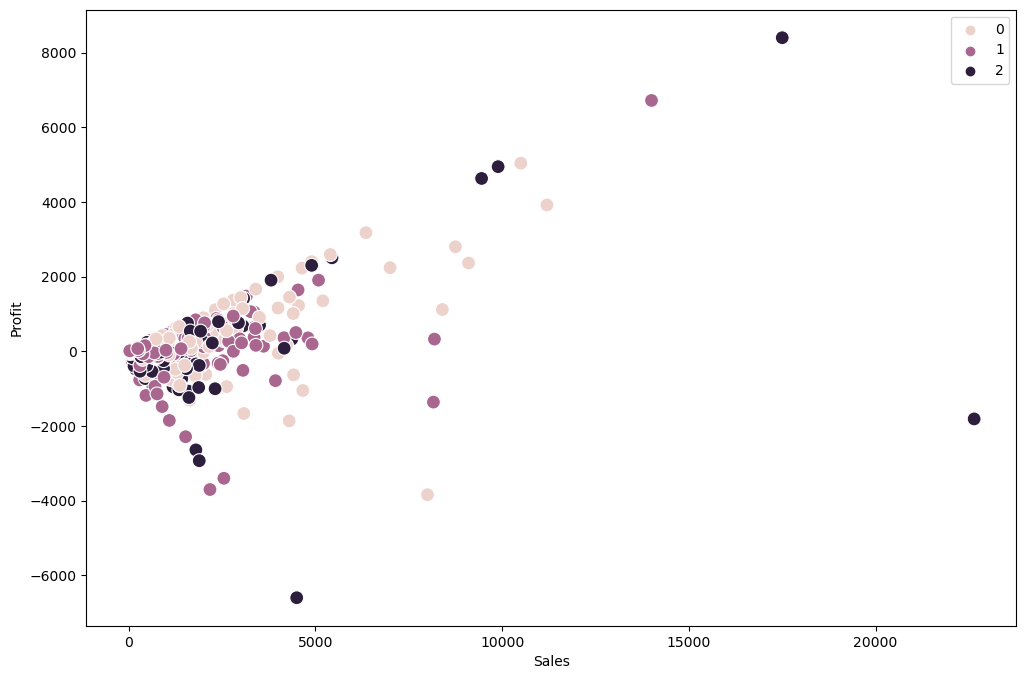

In [25]:
# Plot the clusters for the "Profit" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=SS2['Sales'], y=SS2['Profit'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.show()

### Inference (question# 8)
    The clusters show that cluster 1 which is purple have the most data points and show up close to 0 
    with low or negative profit untill sales increase close to 5k

In [35]:
SS2.loc[SS2['clusters'] == 2, 'cluster'] = 'dark purple'
SS2.loc[SS2['clusters'] == 1, 'cluster'] = 'purple'
SS2.loc[SS2['clusters'] == 0, 'cluster'] = 'pink'

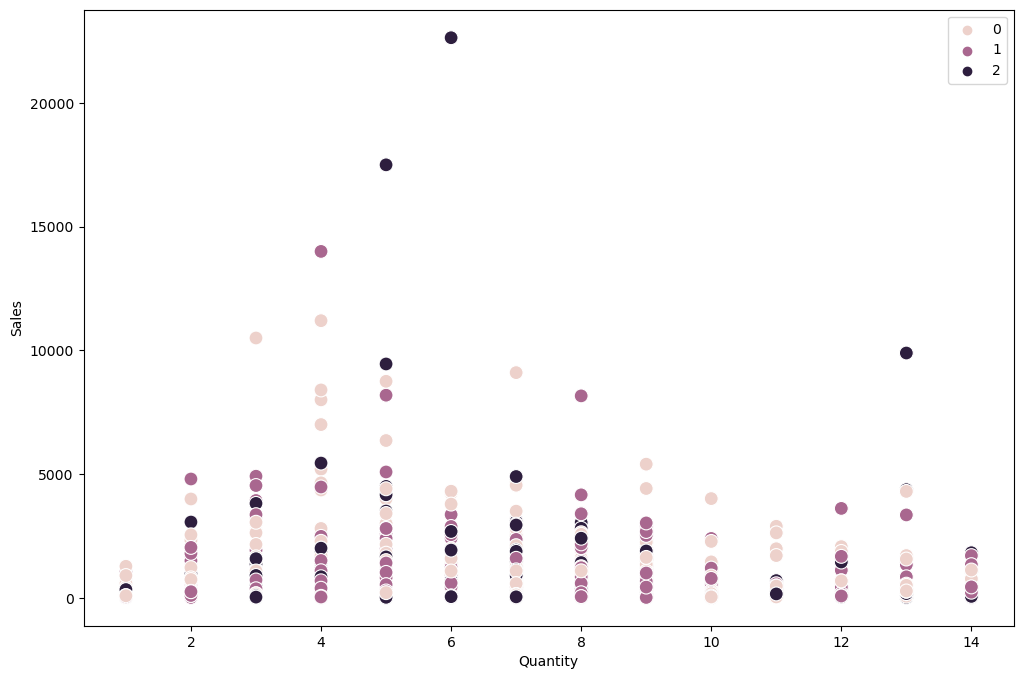

In [27]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=SS2['Quantity'], y=SS2['Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Quantity') 
plt.ylabel('Sales') 
plt.show()

In [40]:
SS2.groupby('cluster').agg({'Discount':['mean', 'median'], 
                        'Quantity':['mean', 'median'], 
                         'Sales':['mean', 'median'],
                            'Profit':['mean', 'median']
                          })

Discount         Quantity              Sales             Profit  \
                 mean median      mean median        mean  median       mean   
cluster                                                                        
dark purple  0.198020    0.2  3.770088    3.0  226.553839  51.450  22.573331   
pink         0.110660    0.0  3.770819    3.0  256.061518  58.374  44.409604   
purple       0.162569    0.2  3.813938    3.0  213.900626  54.320  21.490812   

                       
               median  
cluster                
dark purple   6.55200  
pink         10.30955  
purple        8.67360

### Inference:
    The dark purple cluster has the highest mean for discount, quantity is highest with purple, the pink cluster
    is highest for sales and profit. To investigate the sales and profit we can concentrate on the pink cluster. 
    The quantity and discount have more data in other clusters.

In [36]:
SS2.to_csv(os.path.join(path,'Superstore','Superstore 6_5'))